In [3]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import os

In [4]:
path = "E:\\Servicio\\MEA2\\20211005\\H5\\RAW\\CTR"
content_dir = os.listdir(path)
content_dir.sort()

files = []
for i in range(0, len(content_dir)):
    files.append(h5py.File(path+"\\"+content_dir[i]))

6014000


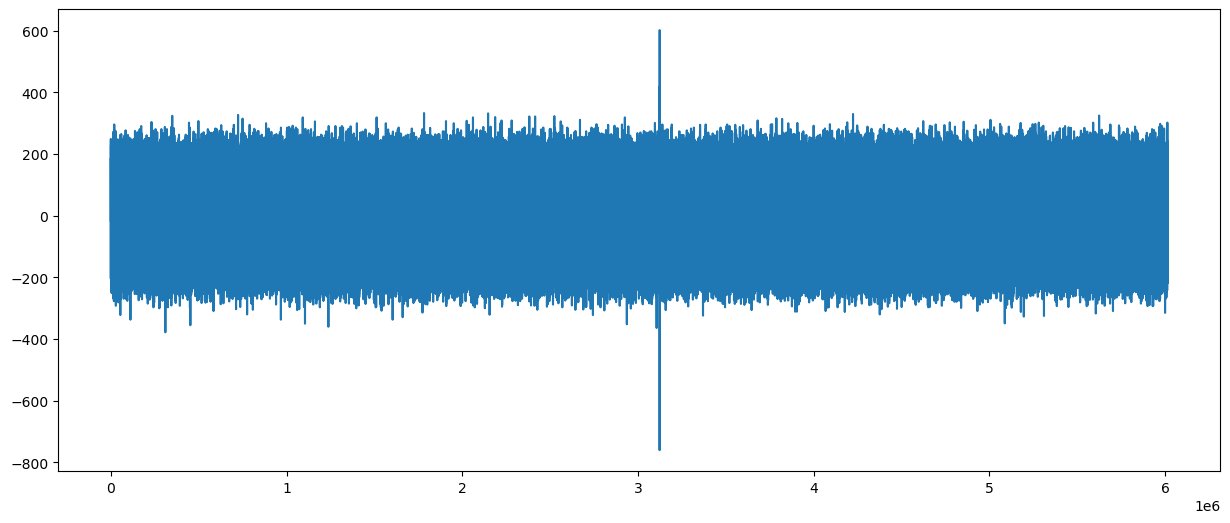

In [5]:
plt.figure(figsize=(15,6))
plt.plot(files[0]['Data']['Recording_0']['AnalogStream']['Stream_0']['ChannelData'][119-35])
print(len(files[0]['Data']['Recording_0']['AnalogStream']['Stream_0']['ChannelData'][119-35]))

In [6]:
#concatenar los tres archivos
segment_35 = []

for i in range(0, len(content_dir)):
    segment_35.append(np.array(files[i]['Data']['Recording_0']['AnalogStream']['Stream_0']['ChannelData'][119-35]))
    
np_segment_35 = np.concatenate(segment_35, axis = 0)

18498000


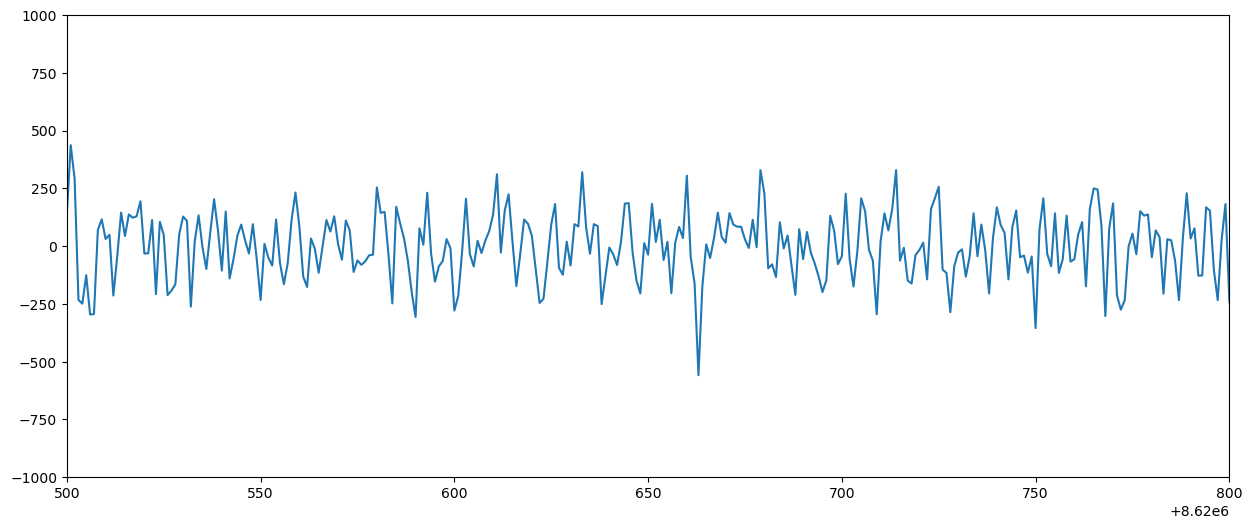

In [7]:
plt.figure(figsize=(15,6))
#plt.ylim(-800,600)
plt.plot(np_segment_35)
plt.axvline(x=6014000, ymin=-1000, ymax=1000, color = "red")
plt.axvline(x=2*6014000, ymin=-1000, ymax=1000, color = "red")
plt.xlim(8620500, 8620800)
plt.ylim(-1000,1000)
#plt.plot([2*6014000, 100], [2*6014000, -100],color="red")
print(len(np_segment_35))

In [11]:
import pickle
# Escritura en modo binario, vacía el fichero si existe
name = path+"\\"+"segment_35"+ ".pckl"
print(name)
electrodes_file = open(name,'wb')
# Escribe la colección en el fichero 
pickle.dump(np_segment_35, electrodes_file) 
electrodes_file.close()

E:\Servicio\MEA2\20211005\H5\RAW\CTR\segment_35.pckl
